In [2]:
from pathlib import Path
import pandas as pd

In [3]:
filepath = "/home/viktor/Documents/kaggle/kaggle_llm/data/data_dumps/more_questions/more_questions_raw_questions_wiki_sci_3.csv"
# filepath = "/home/viktor/Documents/kaggle/kaggle_llm/data/kaggle-llm-science-exam/train.csv"
file_name = filepath.split("/")[-1].split(".")[0]
print(file_name)
csv = pd.read_csv(filepath, index_col=0)
csv.head()

more_questions_raw_questions_wiki_sci_3


,id,prompt,A,B,C,D,E,answer,cluster number,round
0,1,What is the significance of HIP 67522 b?,It is the first hot Jupiter exoplanet ever dis...,It is the youngest hot Jupiter discovered.,It is located in the constellation Centaurus.,It is one of only four planets with a measured...,It will help in knowing how other hot Jupiters...,B,0,0
1,2,Which statement about HIP 67522 b is incorrect?,It is currently the youngest planet of any type.,It is located approximately 415 light-years fr...,It was discovered using the Transiting Exoplan...,Its axial tilt has not been measured.,Its final size will depend on the composition ...,D,0,0
2,3,What is the role of the Kelvin-Helmholtz mecha...,To cause the planet to shrink due to cooling.,To determine the final size of the planet.,To measure the axial tilt of the planet.,To assist in the discovery of hot Jupiters.,To help in knowing how other exoplanets form.,A,0,0
3,4,What is the main focus of the Transiting Exopl...,To study the composition of exoplanet cores.,To measure the axial tilt of hot Jupiters.,To discover exoplanets using the transit method.,To determine the age of exoplanets.,To observe hot Jupiters in the constellation C...,C,0,0
4,5,What is the purpose of the Exoplanets discover...,To provide a list of all exoplanets discovered...,To explain the discovery process of exoplanets.,To discuss the properties of hot Jupiters.,To study the formation of exoplanets.,To analyze the age of exoplanets.,A,0,0


In [4]:
len(csv)

24839

In [4]:
# filepath_2 = "/home/viktor/Documents/kaggle/kaggle_llm/data/kaggle-datasets/15k-high-quality-examples/15k_gpt3.5-turbo.csv"
# csv_2 = pd.read_csv(filepath_2)
# csv_2.head()

In [5]:
# csv = pd.concat([csv, csv_2]).sample(frac=1).reset_index(drop=True)
# csv['id'] = csv.index
# csv

In [5]:
# replace NaN with "None"
csv = csv.fillna("None")

In [6]:
# "Which rows have 'What are the vascular bundles found in' in column 'prompt'?
csv[csv["prompt"].str.contains("What are the vascular bundles found in")]


,id,prompt,A,B,C,D,E,answer,cluster number,round


In [7]:
len(csv)

24839

['B' 'D' 'A' 'C' 'E']


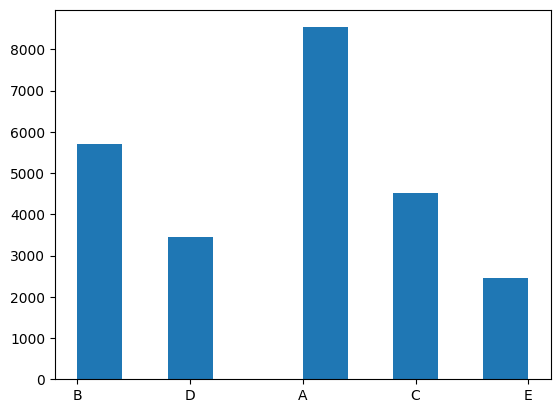

In [11]:
import matplotlib.pyplot as plt

print(csv['answer'].unique())


# csv = csv[(csv['answer'] == 'A') && (csv['answer'] == 'B') && (csv['answer'] == 'C') && (csv['answer'] == 'D') && (csv['answer'] == 'E')]
csv = csv[(csv['answer'] == 'A') | (csv['answer'] == 'B') | (csv['answer'] == 'C') | (csv['answer'] == 'D') | (csv['answer'] == 'E')].reset_index(drop=True)



plt.hist(csv['answer'].values);

In [12]:
import pandas as pd
import numpy as np

def shuffle_answers(df):
    # Shuffle answers
    answers = ['A', 'B', 'C', 'D', 'E']

    for idx, row in df.iterrows():
        current_answer = row['answer']
        
        # Choose a new answer that's different from the current answer
        new_answer = np.random.choice([ans for ans in answers if ans != current_answer])
        
        # Swap the text from the current answer to the new answer and vice-versa
        df.at[idx, current_answer], df.at[idx, new_answer] = df.at[idx, new_answer], df.at[idx, current_answer]
        
        # Update the answer column with the new answer
        df.at[idx, 'answer'] = new_answer


    return df

In [13]:
# Sample DataFrame
data = {
    'id': [1, 2, 3, 4, 5],
    'prompt': ['q1', 'q2', 'q3', 'q4', 'q5'],
    'A': ['text1', 'text2', 'text3', 'text4', 'text5'],
    'B': ['text6', 'text7', 'text8', 'text9', 'text10'],
    'C': ['text11', 'text12', 'text13', 'text14', 'text15'],
    'D': ['text16', 'text17', 'text18', 'text19', 'text20'],
    'E': ['text21', 'text22', 'text23', 'text24', 'text25'],
    'answer': ['A', 'B', 'B', 'A', 'C'],
    'cluster number': [1, 2, 1, 3, 2],
    'round': [1, 1, 2, 2, 3]
}

df = pd.DataFrame(data)
df

,id,prompt,A,B,C,D,E,answer,cluster number,round
0,1,q1,text1,text6,text11,text16,text21,A,1,1
1,2,q2,text2,text7,text12,text17,text22,B,2,1
2,3,q3,text3,text8,text13,text18,text23,B,1,2
3,4,q4,text4,text9,text14,text19,text24,A,3,2
4,5,q5,text5,text10,text15,text20,text25,C,2,3


In [14]:

df = shuffle_answers(df)
df


,id,prompt,A,B,C,D,E,answer,cluster number,round
0,1,q1,text6,text1,text11,text16,text21,B,1,1
1,2,q2,text2,text17,text12,text7,text22,D,2,1
2,3,q3,text3,text23,text13,text18,text8,E,1,2
3,4,q4,text24,text9,text14,text19,text4,E,3,2
4,5,q5,text15,text10,text5,text20,text25,A,2,3


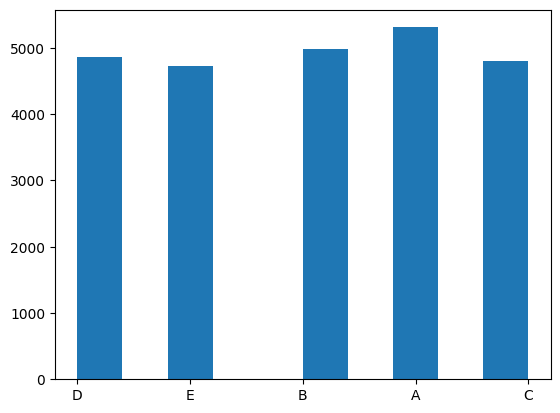

In [16]:
csv = shuffle_answers(csv)

plt.hist(csv['answer'].values);

In [18]:
csv.to_csv("/home/viktor/Documents/kaggle/kaggle_llm/data/data_dumps/more_questions/more_questions_raw_questions_wiki_sci_3_shuffled.csv")

In [17]:
csv

,id,prompt,A,B,C,D,E,answer,cluster number,round
0,1,What is the significance of HIP 67522 b?,It is the first hot Jupiter exoplanet ever dis...,It will help in knowing how other hot Jupiters...,It is located in the constellation Centaurus.,It is the youngest hot Jupiter discovered.,It is one of only four planets with a measured...,D,0,0
1,2,Which statement about HIP 67522 b is incorrect?,It is currently the youngest planet of any type.,It is located approximately 415 light-years fr...,It was discovered using the Transiting Exoplan...,Its axial tilt has not been measured.,Its final size will depend on the composition ...,D,0,0
2,3,What is the role of the Kelvin-Helmholtz mecha...,To determine the final size of the planet.,To help in knowing how other exoplanets form.,To measure the axial tilt of the planet.,To assist in the discovery of hot Jupiters.,To cause the planet to shrink due to cooling.,E,0,0
3,4,What is the main focus of the Transiting Exopl...,To study the composition of exoplanet cores.,To observe hot Jupiters in the constellation C...,To measure the axial tilt of hot Jupiters.,To determine the age of exoplanets.,To discover exoplanets using the transit method.,E,0,0
4,5,What is the purpose of the Exoplanets discover...,To discuss the properties of hot Jupiters.,To explain the discovery process of exoplanets.,To study the formation of exoplanets.,To provide a list of all exoplanets discovered...,To analyze the age of exoplanets.,D,0,0
...,...,...,...,...,...,...,...,...,...,...
24679,24835,What is the magnitude of the two 11th magnitud...,15th,20th,10th,11th,56th,D,999,1
24680,24836,What is the magnitude of the two 15th magnitud...,15th,11th,20th,10th,56th,A,999,1
24681,24837,What type of stars are the brightest likely me...,10th magnitude stars,15th magnitude stars,20th magnitude stars,11th magnitude stars,56th magnitude stars,A,999,1
24682,24838,Which constellation is 19 Cephei located in?,Draco,Orion,Cepheus,Ursa Major,Pegasus,C,999,1


# Experiment with embeddings

In [15]:
from sentence_transformers import SentenceTransformer

model_name = "BAAI/bge-large-en"

model = SentenceTransformer(model_name)

In [16]:
csv['prompt_joined'] = csv[['prompt', 'A', 'B', 'C', 'D', 'E']].apply(lambda x: x['prompt'] + " " + x['A'] + " " + x['B'] + " " + x['C'] + " " + x['D'] + " " + x['E'], axis=1)


In [17]:
csv['embd_prompt'] = csv['prompt_joined'].apply(lambda x: model.encode(x, normalize_embeddings=True))

In [18]:
csv.head()

,prompt,A,B,C,D,E,answer,prompt_joined,embd_prompt
id,,,,,,,,,
0,Which of the following statements accurately d...,MOND is a theory that reduces the observed mis...,MOND is a theory that increases the discrepanc...,MOND is a theory that explains the missing bar...,MOND is a theory that eliminates the observed ...,MOND is a theory that reduces the discrepancy ...,E,Which of the following statements accurately d...,"[-0.006590011, 0.007241744, -0.0152100725, 0.0..."
1,Which of the following is an accurate definiti...,Dynamic scaling refers to the non-evolution of...,Dynamic scaling refers to the non-evolution of...,Dynamic scaling refers to the evolution of sel...,Dynamic scaling refers to the evolution of sel...,Dynamic scaling refers to the evolution of sel...,D,Which of the following is an accurate definiti...,"[-0.0023720644, 0.014086207, 0.011235354, 0.01..."
2,Which of the following statements accurately d...,The triskeles symbol represents three interloc...,The triskeles symbol is a representation of th...,The triskeles symbol is a representation of a ...,The triskeles symbol was reconstructed as a fe...,The triskeles symbol is a representation of th...,D,Which of the following statements accurately d...,"[-0.014039354, -0.0063830204, 0.008411448, -0...."
3,What is the significance of regularization in ...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,B,What is the significance of regularization in ...,"[0.008155294, 0.007417995, 0.027798684, 0.0179..."
4,Which of the following statements accurately d...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,C,Which of the following statements accurately d...,"[-0.0072844736, -0.0036989178, 0.0010034057, -..."


In [19]:
# wiki_sci = pd.read_parquet("../data/wikipedia_pages2_w_embd/wiki_sci_embd_clusters.parquet")
# print("len wiki_sci:", len(wiki_sci))

# def break_text_into_sentences(text):
#     return text.split(". ")

# # Use apply to break each text into sentences and store in a new column
# wiki_sci['sentences'] = wiki_sci['text'].apply(break_text_into_sentences)

# # Create a new dataframe with only the 'sentences' column
# wiki_sci_sentences = pd.DataFrame(wiki_sci['sentences'])

# # If you want each sentence in a separate row
# wiki_sci_sentences = wiki_sci_sentences.explode('sentences').reset_index(drop=True)
# wiki_sci_sentences

# chunk_size = 100000
# num_chunks = len(wiki_sci_sentences) // chunk_size + 1

# for i in range(num_chunks):
#     start_index = i * chunk_size
#     end_index = start_index + chunk_size
#     chunk = wiki_sci_sentences.iloc[start_index:end_index]
#     chunk['sentences_embd'] = chunk['sentences'].progress_apply(lambda x: model.encode(x, normalize_embeddings=True))
#     chunk.to_parquet(f"../data/wikipedia_pages2_w_embd_sentences/wiki_sci_embd_clusters_sentences_{i}.parquet")

# saved to /home/viktor/Documents/kaggle/kaggle_llm/data/wikipedia_pages2_w_embd_sentences/*

In [20]:
!ls -lah /home/viktor/Documents/kaggle/kaggle_llm/data/wikipedia_pages2_w_embd_sentences/* | head

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
-rw-rw-r-- 1 viktor viktor 402M kol  29 08:22 /home/viktor/Documents/kaggle/kaggle_llm/data/wikipedia_pages2_w_embd_sentences/wiki_sci_embd_clusters_sentences_0.parquet
-rw-rw-r-- 1 viktor viktor 402M kol  29 09:59 /home/viktor/Documents/kaggle/kaggle_llm/data/wikipedia_pages2_w_embd_sentences/wiki_sci_embd_clusters_sentences_10.parquet
-rw-rw-r-- 1 viktor viktor 402M kol  29 10:08 /home/viktor/Documents/kaggle/kaggle_llm/data/wikipedia_pages2_w_embd_sentences/wiki_sci_embd_clusters_sentences_11.parquet
-rw-rw-r-- 1 viktor viktor 402M kol  29 10:18 /home/viktor/Documents/kaggle/kaggle_llm/data/wikipedia_pages2_w_embd_sentences/wiki_sci_embd_clusters_sentences_12.parqu

In [21]:
file_path = "/home/viktor/Documents/kaggle/kaggle_llm/data/wikipedia_pages2_w_embd_sentences/wiki_sci_embd_clusters_sentences_0.parquet"
df = pd.read_parquet(file_path)
# remove double spaces  
df['sentences'] = df['sentences'].apply(lambda x: x.replace("  ", " "))
df

,sentences,sentences_embd
0,The Ulakhan Fault is a left-lateral moving tra...,"[-0.028980039, 0.03867789, -0.022340525, 0.009..."
1,It runs from a triple junction in the Chersky...,"[0.0011227154, 0.042402018, -0.027796535, 0.01..."
2,From the offset of dated geomorphological feat...,"[-0.003369958, 0.061145917, -0.006183491, 0.01..."
3,The analysis of fault scarps along the fault z...,"[0.008782866, 0.047354806, 0.004257064, 0.0273..."
4,Tripodal ligands are tri- and tetradentate lig...,"[0.0016080242, -0.0003384063, 0.022075392, 0.0..."
...,...,...
99995,"During the task, animal subjects are operant ...","[0.0012561153, 0.011253346, -0.009115973, 0.01..."
99996,Reinforcement (through the use of the drug) o...,"[-0.0032600083, 0.0022629944, -0.010305869, 0...."
99997,Drug dosing in self-administration studies is ...,"[-0.0027855465, 0.017488176, 0.004970365, 0.01..."
99998,This is an important element of creating a dis...,"[-0.027314313, 0.03127125, -0.010550045, 0.014..."


(0.0, 100.0)

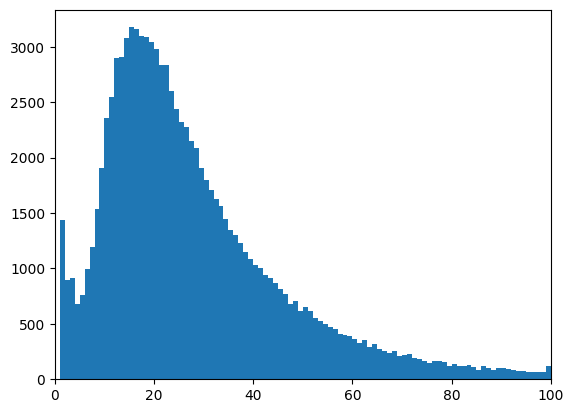

In [22]:
df['sentences_wc'] = df['sentences'].apply(lambda x: len(x.split(" ")))
df['sentences_char_count'] = df['sentences'].apply(lambda x: len(x))
plt.hist(df['sentences_wc'].values, bins=100, range=(0, 100))
plt.xlim(0, 100)

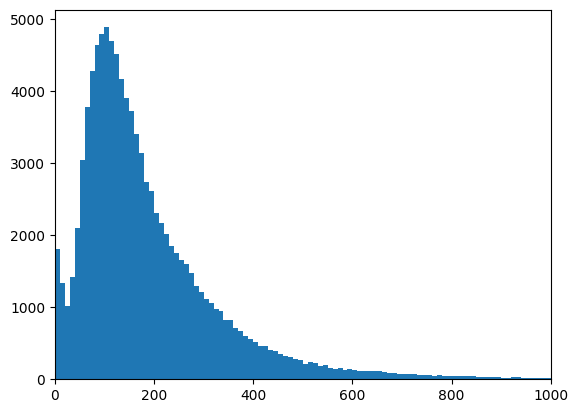

In [23]:
plt.hist(df['sentences_char_count'].values, bins=100, range=(0, 1000));
plt.xlim(0, 1000);

In [24]:
x = np.array(df['sentences_char_count'].values)
x[x > 1000] = 1000
np.average(x)

190.9551

In [30]:
import faiss
from tqdm import tqdm

file_path = f"/home/viktor/Documents/kaggle/kaggle_llm/data/wikipedia_pages2_w_embd_sentences/wiki_sci_embd_clusters_sentences_0.parquet"
wiki_sci_df = pd.read_parquet(file_path)

sentence_embeddings = np.stack(wiki_sci_df['sentences_embd'].values).astype('float32')
sentence_index = faiss.IndexFlatIP(sentence_embeddings.shape[1])
sentence_index.add(sentence_embeddings)

sentences = list(wiki_sci_df['sentences'].values)

for indx in tqdm(range(1,30)):
    file_path = f"/home/viktor/Documents/kaggle/kaggle_llm/data/wikipedia_pages2_w_embd_sentences/wiki_sci_embd_clusters_sentences_{indx}.parquet"
    df_tmp = pd.read_parquet(file_path)
    
    sentence_embeddings = np.stack(df_tmp['sentences_embd'].values).astype('float32')
    sentence_index.add(sentence_embeddings)
    
    
    # wiki_sci_df = pd.concat([wiki_sci_df, df_tmp])
    sentences.append(list(df_tmp['sentences'].values))
    
    del df_tmp


100%|██████████| 29/29 [00:34<00:00,  1.19s/it]


In [31]:
wiki_sci_df['sentences'] = wiki_sci_df['sentences'].apply(lambda x: x.replace("  ", " "))

In [32]:
wiki_sci_df.iloc[0]

sentences         The Ulakhan Fault is a left-lateral moving tra...
sentences_embd    [-0.028980039, 0.03867789, -0.022340525, 0.009...
Name: 0, dtype: object

In [33]:
query_vector = wiki_sci_df.iloc[0]['sentences_embd']
query_vector = np.expand_dims(query_vector, axis=0)
print(query_vector.shape)
distances, indices = sentence_index.search(query_vector, k=3)
indices

(1, 1024)


array([[      0,  738232, 1990592]])

In [34]:
sentences[indices[0][0]]

'The Ulakhan Fault is a left-lateral moving transform fault that runs along the boundary between two tectonic plates in northeast Asia, the North American Plate, and the Okhotsk Plate'

In [31]:
sentences[0]

'Which of the following statements accurately describes the impact of Modified Newtonian Dynamics (MOND) on the observed "missing baryonic mass" discrepancy in galaxy clusters? MOND is a theory that reduces the observed missing baryonic mass in galaxy clusters by postulating the existence of a new form of matter called "fuzzy dark matter." MOND is a theory that reduces the discrepancy between the observed missing baryonic mass in galaxy clusters and the measured velocity dispersions from a factor of around 10 to a factor of about 2. MOND is a theory that explains the missing baryonic mass in galaxy clusters that was previously considered dark matter by demonstrating that the mass is in the form of neutrinos and axions. MOND is a theory that increases the discrepancy between the observed missing baryonic mass in galaxy clusters and the measured velocity dispersions from a factor of around 10 to a factor of about 20. MOND is a theory that eliminates the observed missing baryonic mass in 

In [28]:
# experimenting with Faiss
import faiss

sentence_embeddings = np.stack(wiki_sci_df['sentences_embd'].values)

sentence_index = faiss.IndexFlatIP(sentence_embeddings.shape[1])
sentence_index.add(sentence_embeddings)

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:7                                                                                    │
│                                                                                                  │
│   4 sentence_embeddings = np.stack(wiki_sci_df['sentences_embd'].values)                         │
│   5                                                                                              │
│   6 sentence_index = faiss.IndexFlatIP(sentence_embeddings.shape[1])                             │
│ ❱ 7 sentence_index.add(sentence_embeddings)                                                      │
│   8                                                                                              │
│                                                                                                  │
│ /home/viktor/miniconda3/envs/torch-env/lib/python3.9/site-packages/faiss/__init__.py:215 in      │
│ replacement_add                                                                                  │
│                                                                                                  │
│    212 │   │                                                                                     │
│    213 │   │   n, d = x.shape                                                                    │
│    214 │   │   assert d == self.d                                                                │
│ ❱  215 │   │   self.add_c(n, swig_ptr(x))                                                        │
│    216 │                                                                                         │
│    217 │   def replacement_add_with_ids(self, x, ids):                                           │
│    218 │   │   """Adds vectors with arbitrary ids to the index (not all indexes support this).   │
│                                                                                                  │
│ /home/viktor/miniconda3/envs/torch-env/lib/python3.9/site-packages/faiss/swigfaiss.py:2112 in    │
│ add                                                                                              │
│                                                                                                  │
│    2109 │                                                                                        │
│    2110 │   def add(self, n, x):                                                                 │
│    2111 │   │   r""" default add uses sa_encode"""                                               │
│ ❱  2112 │   │   return _swigfaiss.IndexFlatCodes_add(self, n, x)                                 │
│    2113 │                                                                                        │
│    2114 │   def reset(self):                                                                     │
│    2115 │   │   return _swigfaiss.IndexFlatCodes_reset(self)                                     │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
TypeError: in method 'IndexFlatCodes_add', argument 3 of type 'float const *'

In [28]:
sentence_embeddings

array([[-0.02898004,  0.03867789, -0.02234052, ..., -0.03505166,
        -0.04531394, -0.00110811],
       [ 0.00112272,  0.04240202, -0.02779653, ..., -0.02910543,
         0.00391395,  0.00349723],
       [-0.00336996,  0.06114592, -0.00618349, ..., -0.01650087,
        -0.04385982,  0.01373864],
       ...,
       [-0.00212454, -0.01516499,  0.02202366, ...,  0.00417129,
        -0.02342837, -0.00161467],
       [ 0.00369588, -0.0129824 ,  0.01368309, ...,  0.00818462,
        -0.02140316, -0.00775784],
       [-0.00516454,  0.02833758,  0.0163472 , ...,  0.00771741,
        -0.01179328,  0.01271827]], dtype=float32)

In [48]:
import torch

def get_top_n_similar_sentences(x_sentence_embd, top_n=10, clip_sentence_length=1000):
    
    #top_n=5 is chosen because on average you'll get 5*191.11014 ~ 1000 characters, which can fit in your memory.
    
    dot_products_final = []
    top_n_sentences_final = []
    
    x_sentence_embd = torch.from_numpy(x_sentence_embd).half().to("cuda")
    
    for indx in range(10):
        wiki_sci_df_tmp = wiki_sci_df.iloc[indx*300000:(indx+1)*300000]
        sentences_embd = np.stack(wiki_sci_df_tmp['sentences_embd'].values)
        
        
        sentences_embd = torch.from_numpy(sentences_embd).half().to("cuda")
        
        dot_products = sentences_embd @ x_sentence_embd # shape (n,)
        dot_products = dot_products.cpu().numpy()
        
        top_n_indices = np.argsort(dot_products)[-top_n:]
        top_n_sentences = wiki_sci_df_tmp.iloc[top_n_indices]['sentences'].values
        top_n_sentences = [x[:clip_sentence_length] for x in top_n_sentences]
        
        
        # append
        dot_products_final.append(dot_products[top_n_indices])
        top_n_sentences_final.append(top_n_sentences)
        
    # return lists
    dot_products_final = np.concatenate(dot_products_final)
    top_n_sentences_final = np.concatenate(top_n_sentences_final)
    
    # sort by dot_products_final
    sort_indices = np.argsort(dot_products_final)[::-1]
    dot_products_final = dot_products_final[sort_indices]
    top_n_sentences_final = top_n_sentences_final[sort_indices]
    
    return dot_products_final, top_n_sentences_final
    
        

In [49]:
# x = np.random.randn(1024)
# %time get_top_n_similar_sentences(x) # ~ 6 s per prompt
# # get_top_n_similar_sentences(x)

# Create a new dataset

In [50]:
from tqdm import tqdm 

for indx, row in tqdm(csv.iterrows(), total=len(csv)):
    
    prompt_embedding = row['embd_prompt'] # shape (1024,)
    
    dot_products_final, top_n_sentences_final = get_top_n_similar_sentences(prompt_embedding)
    
    context = "Context: "
    for sentence in top_n_sentences_final:
        context += sentence + ". "
    context = context[:1000]
    
    # print(context)
    # print("---"*128)
    
    csv.at[indx, 'wiki_context'] = context
    
    

  6%|▌         | 12/200 [00:45<11:58,  3.82s/it]


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:7                                                                                    │
│                                                                                                  │
│    4 │                                                                                           │
│    5 │   prompt_embedding = row['embd_prompt'] # shape (1024,)                                   │
│    6 │                                                                                           │
│ ❱  7 │   dot_products_final, top_n_sentences_final = get_top_n_similar_sentences(prompt_embed    │
│    8 │                                                                                           │
│    9 │   context = "Context: "                                                                   │
│   10 │   for sentence in top_n_sentences_final:                                                  │
│                                                                                                  │
│ in get_top_n_similar_sentences:14                                                                │
│                                                                                                  │
│   11 │                                                                                           │
│   12 │   for indx in range(10):                                                                  │
│   13 │   │   wiki_sci_df_tmp = wiki_sci_df.iloc[indx*300000:(indx+1)*300000]                     │
│ ❱ 14 │   │   sentences_embd = np.stack(wiki_sci_df_tmp['sentences_embd'].values)                 │
│   15 │   │                                                                                       │
│   16 │   │                                                                                       │
│   17 │   │   sentences_embd = torch.from_numpy(sentences_embd).half().to("cuda")                 │
│ in stack:200                                                                                     │
│                                                                                                  │
│ /home/viktor/miniconda3/envs/torch-env/lib/python3.9/site-packages/numpy/core/shape_base.py:471  │
│ in stack                                                                                         │
│                                                                                                  │
│   468 │                                                                                          │
│   469 │   sl = (slice(None),) * axis + (_nx.newaxis,)                                            │
│   470 │   expanded_arrays = [arr[sl] for arr in arrays]                                          │
│ ❱ 471 │   return _nx.concatenate(expanded_arrays, axis=axis, out=out,                            │
│   472 │   │   │   │   │   │      dtype=dtype, casting=casting)                                   │
│   473                                                                                            │
│   474                                                                                            │
│ in concatenate:200                                                                               │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
KeyboardInterrupt

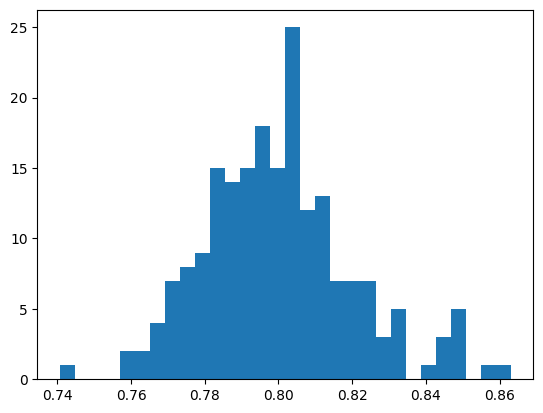

In [25]:
plt.hist(dot_prod_values, bins=30);

In [28]:
np.sum(np.array(dot_prod_values)>0.84) / len(dot_prod_values)

0.935

Kaggle questions are scientific (dotprod > 0.84).
In our case, only a 1/3 of the questions are scientific (dotprod > 0.84).

Since wiki sci dataset size is 5k, and we added 15k, this means that only about 6.4k questions are scientific.

In [29]:
csv.head()

,prompt,A,B,C,D,E,answer,prompt_joined,embd_prompt,wiki_context,dot_prod
id,,,,,,,,,,,
0,Which of the following statements accurately d...,MOND is a theory that reduces the observed mis...,MOND is a theory that increases the discrepanc...,MOND is a theory that explains the missing bar...,MOND is a theory that eliminates the observed ...,MOND is a theory that reduces the discrepancy ...,E,Which of the following statements accurately d...,"[-0.006590011, 0.007241744, -0.0152100725, 0.0...",Context from page 0: \nAccording to modern mod...,0.858076
1,Which of the following is an accurate definiti...,Dynamic scaling refers to the evolution of sel...,Dynamic scaling refers to the non-evolution of...,Dynamic scaling refers to the evolution of sel...,Dynamic scaling refers to the non-evolution of...,Dynamic scaling refers to the evolution of sel...,C,Which of the following is an accurate definiti...,"[-0.0015559951, 0.013225615, 0.011874938, 0.01...","Context from page 0: \n\n \n\nIn mathematics, ...",0.854220
2,Which of the following statements accurately d...,The triskeles symbol is a representation of a ...,The triskeles symbol is a representation of th...,The triskeles symbol was reconstructed as a fe...,The triskeles symbol represents three interloc...,The triskeles symbol is a representation of th...,C,Which of the following statements accurately d...,"[-0.015465815, -0.0025814439, 0.0074097873, -0...",Context from page 0: \nHigh visibility of the ...,0.813284
3,What is the significance of regularization in ...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,D,What is the significance of regularization in ...,"[0.007184312, 0.0061979643, 0.027658291, 0.018...",Context from page 0: \nIn quantum field theory...,0.887705
4,Which of the following statements accurately d...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,B,Which of the following statements accurately d...,"[-0.0065864255, -0.004134359, 0.002627052, -0....","Context from page 0: \nIn optics, the Fraunhof...",0.843096


In [30]:
csv['new_prompt'] = csv[['prompt', 'wiki_context']].apply(lambda x: x['prompt'] + "\n" + x['wiki_context'], axis=1)
csv.sample(1)['new_prompt'].values[0]

'What is the relationship between the amplitude of a sound wave and its loudness?\nContext from page 0: \nA sound unit is any acoustic unit of sound measurement.\n\ndB, decibel - noise of sound measurement is called decibels (dB). Ratio of the sound pressure to reference pressure to something. \nsone - a unit of perceived loudness equal to the loudness of a 1000-hertz tone at 40\xa0dB above threshold, starting with 1 sone.\nphon - a unit of subjective loudness.\nHz, hertz = unit of sound frequency is called hertz (Hz)\n\nSound\nSystems of units'

In [31]:
csv['prompt'] = csv['new_prompt']

In [32]:
# # drop columns cluster number, round, prompt_joined, embd_prompt, wiki_context, dot_prod, new_prompt
# csv = csv.drop(columns=['cluster number', 'round', 'prompt_joined', 'embd_prompt', 'wiki_context', 'dot_prod', 'new_prompt'])
# csv

In [23]:
from sentence_transformers import SentenceTransformer
model_name = "/home/viktor/Documents/kaggle/kaggle_llm/data/huggingface_hub_models/bge-large-en"

models_folder = "/home/viktor/Documents/kaggle/kaggle_llm/data/huggingface_hub_models/bge-large-en"
model = SentenceTransformer("BAAI/bge-large-en")
model.save(models_folder)

In [24]:
models_folder = "/home/viktor/Documents/kaggle/kaggle_llm/data/huggingface_hub_models/bge-large-en"
model = SentenceTransformer(models_folder)

# Train-test split

In [33]:
n = 10
train_csv = csv.head(-n).reset_index(drop=True)
test_csv = csv.tail(n).reset_index(drop=True)

In [34]:
train_csv.tail()

,prompt,A,B,C,D,E,answer,prompt_joined,embd_prompt,wiki_context,dot_prod,new_prompt
185,What is the Kelvin-Helmholtz instability and h...,The Kelvin-Helmholtz instability is a phenomen...,The Kelvin-Helmholtz instability is a phenomen...,The Kelvin-Helmholtz instability is a phenomen...,The Kelvin-Helmholtz instability is a phenomen...,The Kelvin-Helmholtz instability is a phenomen...,B,What is the Kelvin-Helmholtz instability and h...,"[-0.044089768, 0.037210576, -0.0070027397, 0.0...",Context from page 0: \nMagnetic pulsations are...,0.894209,What is the Kelvin-Helmholtz instability and h...
186,What is the significance of the high degree of...,The high degree of fatty-acyl disorder in the ...,The high degree of fatty-acyl disorder in the ...,The high degree of fatty-acyl disorder in the ...,The high degree of fatty-acyl disorder in the ...,The high degree of fatty-acyl disorder in the ...,D,What is the significance of the high degree of...,"[-0.01185309, -0.011605349, 0.025415594, 0.035...",Context from page 0: \nLipid microdomains are ...,0.870047,What is the significance of the high degree of...
187,What is the explanation for the effective supe...,Two different color charges close together app...,Two different color charges close together app...,Two different color charges close together app...,Two different color charges close together app...,Two different color charges close together app...,C,What is the explanation for the effective supe...,"[-0.00106749, -0.02040491, -0.006127452, -0.00...","Context from page 0: \nIn particle physics, a ...",0.893522,What is the explanation for the effective supe...
188,What is the relationship between the complete ...,The complete electromagnetic Hamiltonian of an...,The complete electromagnetic Hamiltonian of an...,The complete electromagnetic Hamiltonian of an...,The complete electromagnetic Hamiltonian of an...,The complete electromagnetic Hamiltonian of an...,E,What is the relationship between the complete ...,"[-0.019587675, 0.002329411, -0.01884775, -0.00...","Context from page 0: \nIn quantum mechanics, t...",0.878543,What is the relationship between the complete ...
189,What is the difference between active and pass...,Passive transport is powered by the arithmetic...,Active transport and passive transport both re...,Passive transport requires energy input from t...,Active transport and passive transport are bot...,Active transport is powered by the arithmetic ...,A,What is the difference between active and pass...,"[-0.0044511063, 0.0141452225, -0.025033241, 0....",Context from page 0: \nSolute pumping is a for...,0.867693,What is the difference between active and pass...


In [35]:
test_csv.head()

,prompt,A,B,C,D,E,answer,prompt_joined,embd_prompt,wiki_context,dot_prod,new_prompt
0,What is the Heisenberg uncertainty principle a...,The Heisenberg uncertainty principle states th...,The Heisenberg uncertainty principle states th...,The Heisenberg uncertainty principle states th...,The Heisenberg uncertainty principle states th...,The Heisenberg uncertainty principle states th...,B,What is the Heisenberg uncertainty principle a...,"[-0.018954946, -0.0036566027, -0.0025266286, 0...",Context from page 0: \nHeisenberg's uncertaint...,0.888480,What is the Heisenberg uncertainty principle a...
1,What is the difference between natural convect...,Natural convection and forced convection are t...,Natural convection and forced convection are t...,Natural convection and forced convection are t...,Natural convection is when a fluid is forced t...,Natural convection occurs when a fluid is in c...,E,What is the difference between natural convect...,"[-0.020029161, 0.018435447, -0.014645603, 0.00...",Context from page 0: \nConvection (or convecti...,0.869955,What is the difference between natural convect...
2,What is magnetic susceptibility?\nContext from...,Magnetic susceptibility is a measure of how mu...,Magnetic susceptibility is a measure of how mu...,Magnetic susceptibility is a measure of how mu...,Magnetic susceptibility is a measure of how mu...,Magnetic susceptibility is a measure of how mu...,C,What is magnetic susceptibility? Magnetic susc...,"[0.0038739028, 0.009475257, -0.03191621, 0.009...","Context from page 0: \nIn electromagnetism, th...",0.925161,What is magnetic susceptibility?\nContext from...
3,"What is a transient condensation cloud, also k...",A visible cloud of smoke that forms when a nuc...,A visible cloud of gas that forms when a nucle...,A visible cloud of microscopic water droplets ...,A visible cloud of microscopic water droplets ...,A visible cloud of smoke that forms when a nuc...,D,"What is a transient condensation cloud, also k...","[0.0064468333, -0.0010157891, 0.011831308, 0.0...",Context from page 0: \nA transient condensatio...,0.925772,"What is a transient condensation cloud, also k..."
4,What is a uniform tiling in the hyperbolic pla...,A uniform tiling in the hyperbolic plane is a ...,A uniform tiling in the hyperbolic plane is a ...,A uniform tiling in the hyperbolic plane is a ...,A uniform tiling in the hyperbolic plane is an...,A uniform tiling in the hyperbolic plane is an...,E,What is a uniform tiling in the hyperbolic pla...,"[0.007851681, 0.01345933, -0.005235581, -0.021...","Context from page 0: \nIn hyperbolic geometry,...",0.940439,What is a uniform tiling in the hyperbolic pla...


In [36]:
test_csv.index = list(range(len(test_csv)))
test_csv.index.name = "id"
test_csv.head()

,prompt,A,B,C,D,E,answer,prompt_joined,embd_prompt,wiki_context,dot_prod,new_prompt
id,,,,,,,,,,,,
0,What is the Heisenberg uncertainty principle a...,The Heisenberg uncertainty principle states th...,The Heisenberg uncertainty principle states th...,The Heisenberg uncertainty principle states th...,The Heisenberg uncertainty principle states th...,The Heisenberg uncertainty principle states th...,B,What is the Heisenberg uncertainty principle a...,"[-0.018954946, -0.0036566027, -0.0025266286, 0...",Context from page 0: \nHeisenberg's uncertaint...,0.888480,What is the Heisenberg uncertainty principle a...
1,What is the difference between natural convect...,Natural convection and forced convection are t...,Natural convection and forced convection are t...,Natural convection and forced convection are t...,Natural convection is when a fluid is forced t...,Natural convection occurs when a fluid is in c...,E,What is the difference between natural convect...,"[-0.020029161, 0.018435447, -0.014645603, 0.00...",Context from page 0: \nConvection (or convecti...,0.869955,What is the difference between natural convect...
2,What is magnetic susceptibility?\nContext from...,Magnetic susceptibility is a measure of how mu...,Magnetic susceptibility is a measure of how mu...,Magnetic susceptibility is a measure of how mu...,Magnetic susceptibility is a measure of how mu...,Magnetic susceptibility is a measure of how mu...,C,What is magnetic susceptibility? Magnetic susc...,"[0.0038739028, 0.009475257, -0.03191621, 0.009...","Context from page 0: \nIn electromagnetism, th...",0.925161,What is magnetic susceptibility?\nContext from...
3,"What is a transient condensation cloud, also k...",A visible cloud of smoke that forms when a nuc...,A visible cloud of gas that forms when a nucle...,A visible cloud of microscopic water droplets ...,A visible cloud of microscopic water droplets ...,A visible cloud of smoke that forms when a nuc...,D,"What is a transient condensation cloud, also k...","[0.0064468333, -0.0010157891, 0.011831308, 0.0...",Context from page 0: \nA transient condensatio...,0.925772,"What is a transient condensation cloud, also k..."
4,What is a uniform tiling in the hyperbolic pla...,A uniform tiling in the hyperbolic plane is a ...,A uniform tiling in the hyperbolic plane is a ...,A uniform tiling in the hyperbolic plane is a ...,A uniform tiling in the hyperbolic plane is an...,A uniform tiling in the hyperbolic plane is an...,E,What is a uniform tiling in the hyperbolic pla...,"[0.007851681, 0.01345933, -0.005235581, -0.021...","Context from page 0: \nIn hyperbolic geometry,...",0.940439,What is a uniform tiling in the hyperbolic pla...


In [37]:
# out_dir = Path("../data/raw_questions_wiki_sci_1-splitted-w-wiki-sentence-context/")
out_dir = Path("../data/kaggle-llm-science-exam-test-context-splitted-w-wiki-sentence-context/")
out_dir.mkdir(exist_ok=False, parents=True)

train_csv.to_csv(out_dir / f"{file_name}_train.csv")
test_csv.to_csv(out_dir / f"{file_name}_test.csv")

In [38]:
train_csv

,prompt,A,B,C,D,E,answer,prompt_joined,embd_prompt,wiki_context,dot_prod,new_prompt
0,Which of the following statements accurately d...,MOND is a theory that reduces the observed mis...,MOND is a theory that increases the discrepanc...,MOND is a theory that explains the missing bar...,MOND is a theory that eliminates the observed ...,MOND is a theory that reduces the discrepancy ...,E,Which of the following statements accurately d...,"[-0.006590011, 0.007241744, -0.0152100725, 0.0...",Context from page 0: \nAccording to modern mod...,0.858076,Which of the following statements accurately d...
1,Which of the following is an accurate definiti...,Dynamic scaling refers to the evolution of sel...,Dynamic scaling refers to the non-evolution of...,Dynamic scaling refers to the evolution of sel...,Dynamic scaling refers to the non-evolution of...,Dynamic scaling refers to the evolution of sel...,C,Which of the following is an accurate definiti...,"[-0.0015559951, 0.013225615, 0.011874938, 0.01...","Context from page 0: \n\n \n\nIn mathematics, ...",0.854220,Which of the following is an accurate definiti...
2,Which of the following statements accurately d...,The triskeles symbol is a representation of a ...,The triskeles symbol is a representation of th...,The triskeles symbol was reconstructed as a fe...,The triskeles symbol represents three interloc...,The triskeles symbol is a representation of th...,C,Which of the following statements accurately d...,"[-0.015465815, -0.0025814439, 0.0074097873, -0...",Context from page 0: \nHigh visibility of the ...,0.813284,Which of the following statements accurately d...
3,What is the significance of regularization in ...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,D,What is the significance of regularization in ...,"[0.007184312, 0.0061979643, 0.027658291, 0.018...",Context from page 0: \nIn quantum field theory...,0.887705,What is the significance of regularization in ...
4,Which of the following statements accurately d...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,B,Which of the following statements accurately d...,"[-0.0065864255, -0.004134359, 0.002627052, -0....","Context from page 0: \nIn optics, the Fraunhof...",0.843096,Which of the following statements accurately d...
...,...,...,...,...,...,...,...,...,...,...,...,...
185,What is the Kelvin-Helmholtz instability and h...,The Kelvin-Helmholtz instability is a phenomen...,The Kelvin-Helmholtz instability is a phenomen...,The Kelvin-Helmholtz instability is a phenomen...,The Kelvin-Helmholtz instability is a phenomen...,The Kelvin-Helmholtz instability is a phenomen...,B,What is the Kelvin-Helmholtz instability and h...,"[-0.044089768, 0.037210576, -0.0070027397, 0.0...",Context from page 0: \nMagnetic pulsations are...,0.894209,What is the Kelvin-Helmholtz instability and h...
186,What is the significance of the high degree of...,The high degree of fatty-acyl disorder in the ...,The high degree of fatty-acyl disorder in the ...,The high degree of fatty-acyl disorder in the ...,The high degree of fatty-acyl disorder in the ...,The high degree of fatty-acyl disorder in the ...,D,What is the significance of the high degree of...,"[-0.01185309, -0.011605349, 0.025415594, 0.035...",Context from page 0: \nLipid microdomains are ...,0.870047,What is the significance of the high degree of...
187,What is the explanation for the effective supe...,Two different color charges close together app...,Two different color charges close together app...,Two different color charges close together app...,Two different color charges close together app.